In [21]:
import pandas as pd
import pm4py

# 1) Timestamp conversion + pandas → EventLog
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter
from pm4py.objects.conversion.log.variants.to_event_log import Parameters
from pm4py.objects.conversion.process_tree.variants.to_petri_net import apply as pt_to_petri

from pm4py.algo.discovery.inductive.algorithm import apply as inductive_apply  
from pm4py.algo.discovery.alpha.algorithm     import apply as alpha_miner      # :contentReference[oaicite:1]{index=1}

from pm4py.algo.conformance.alignments.petri_net.algorithm import apply as align_trace, apply_log as align_log  # :contentReference[oaicite:2]{index=2}


from pm4py.visualization.petri_net.visualizer import view as pn_visualizer
from pm4py.visualization.petri_net.common.visualize import apply as vis_factory



In [5]:
from pm4py.objects.conversion.process_tree.variants.to_petri_net import apply as pt_to_petri


In [35]:
from pm4py.algo.discovery.heuristics.variants.classic import apply as heuristc_miner


In [14]:
df = pd.read_pickle("./data/1_logs_org_c.pkl")
# df.to_csv("org_c_logs.csv")

In [16]:
df[df["case_seq_num"] == "1-647953636"]

,org_group,res_country,org_country,org_res,org_involved,org_role,concept_name,impact,product,lifecycle_transition,timestamp,case_seq_num
1686,D2,Belgium,nl,David,Org line C,A2_1,Accepted,Medium,PROD542,In Progress,2012-01-19 13:10:43+00:00,1-647953636
1687,D2,Belgium,nl,David,Org line C,A2_1,Accepted,Medium,PROD542,In Progress,2012-01-19 13:10:57+00:00,1-647953636


In [12]:
trace_variants = df.groupby("case_seq_num")["concept_name"].apply(lambda seq: tuple(seq))
variants_counts= trace_variants.value_counts()
bad_cases = trace_variants[trace_variants == ('Accepted','Accepted')].index.tolist()
bad_cases

['1-647953636',
 '1-651324866',
 '1-654423931',
 '1-655021441',
 '1-686885675',
 '1-687329729',
 '1-687710013',
 '1-691129791',
 '1-692758994',
 '1-696915401',
 '1-697478298',
 '1-699262145',
 '1-699719677',
 '1-700135371',
 '1-700205396',
 '1-703263656',
 '1-705847078',
 '1-706845546',
 '1-707196413',
 '1-707807221',
 '1-709804068',
 '1-709831036',
 '1-712891909',
 '1-712979761',
 '1-717126508',
 '1-717228961',
 '1-717764374',
 '1-717770354',
 '1-717854005',
 '1-718162127',
 '1-718977997',
 '1-720016461',
 '1-720162489',
 '1-720413010',
 '1-722053011',
 '1-722180065',
 '1-722180141',
 '1-722261790',
 '1-722485381',
 '1-726528943',
 '1-726747811',
 '1-728308361',
 '1-728423732',
 '1-728449782',
 '1-729278754',
 '1-729371940',
 '1-729423561',
 '1-729440375',
 '1-729473091',
 '1-729654566',
 '1-729769620',
 '1-729830322',
 '1-729857533',
 '1-729910993',
 '1-730018116',
 '1-730040641',
 '1-730040885',
 '1-730067183',
 '1-730077100',
 '1-730081514',
 '1-730561221',
 '1-730655701',
 '1-7306

In [38]:
mapping = {
    "Assigned": "assignment",
    "Awaiting Assignment": "assignment",
    
    "In Progress": "work",
    "In Call": "work",
    
    "Wait - Implementation": "wait",
    "Wait": "wait",
    "Wait - User": "wait",
    "Wait - Vendor": "wait",
    
    "Resolved": "close",
    "Closed": "close",
    
    "Cancelled": "cancelled",
}

df["lifecycle_transition"] = df["lifecycle_transition"].map(mapping)
df = df[df["lifecycle_transition"].ne(df.groupby("case_seq_num")["lifecycle_transition"].shift())].reset_index(drop=True)


In [39]:
df = df[["case_seq_num", "lifecycle_transition", "timestamp"]]
df = df.sort_values(["case_seq_num", "timestamp"])
df = df.rename(columns={
    "case_seq_num": "case:concept:name",
    "lifecycle_transition": "concept:name",
    "timestamp": "time:timestamp"
})

df = dataframe_utils.convert_timestamp_columns_in_df(df)
df = pm4py.format_dataframe(
    df,
    case_id="case:concept:name",
    activity_key="concept:name",
    timestamp_key="time:timestamp",
    timest_format=None
)
lg = log_converter.apply(df, variant=log_converter.Variants.TO_EVENT_LOG)

tree = inductive_apply(lg, parameters={"noise_threshold": 0.2})
net, im, fm = pt_to_petri(tree)


In [41]:
net_h, im_h, fm_h = heuristc_miner(lg)


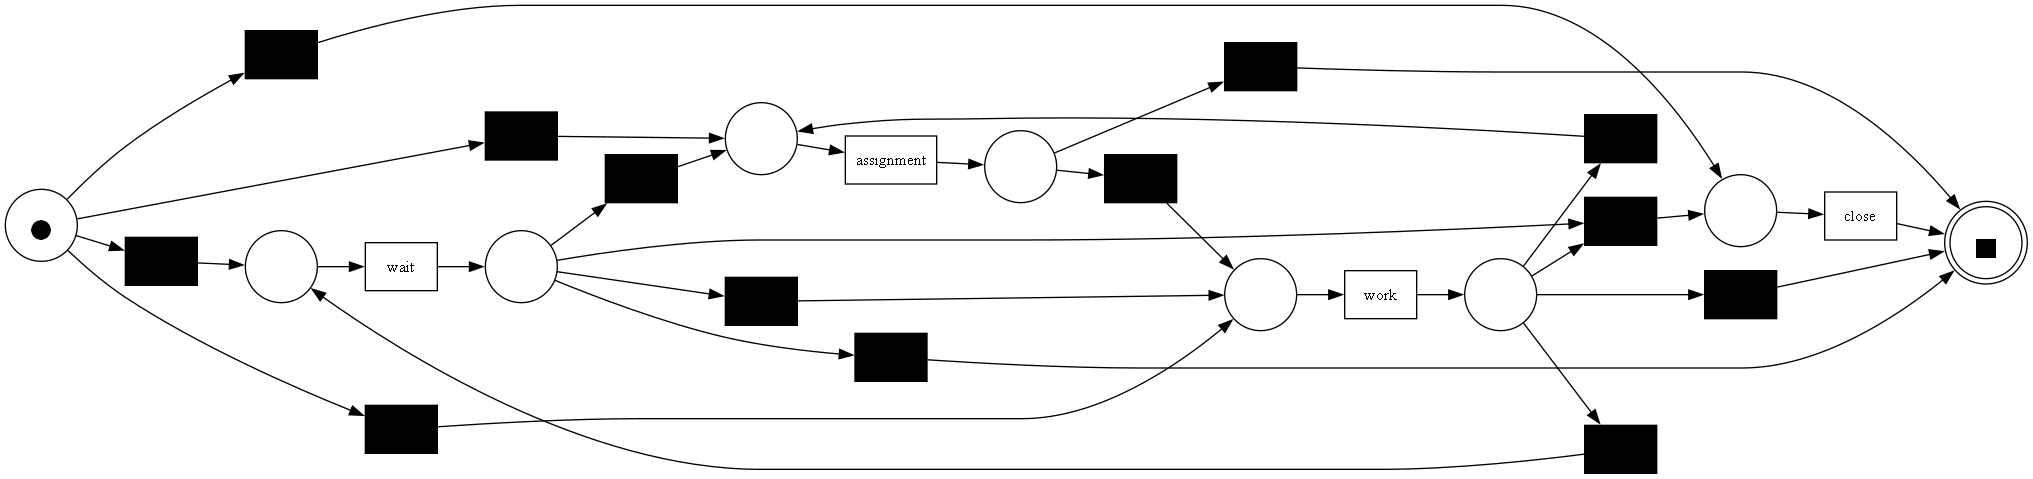

In [42]:
gviz = vis_factory(net_h, im_h, fm_h)
pn_visualizer(gviz)


In [2]:
import pandas as pd
df = pd.read_pickle("./data/1_logs_org_c.pkl")



In [4]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
dur = df.groupby("case_seq_num")["timestamp"].agg(start="min", end="max").reset_index()

dur

,case_seq_num,start,end
0,1-642714990,2012-01-16 13:41:18+00:00,2012-03-30 14:48:12+00:00
1,1-642761396,2012-01-16 14:44:45+00:00,2012-01-23 17:01:19+00:00
2,1-643546500,2012-01-17 14:10:40+00:00,2012-01-23 14:31:43+00:00
3,1-643733486,2012-01-17 16:17:24+00:00,2012-01-19 15:26:36+00:00
4,1-644761840,2012-01-18 10:44:15+00:00,2012-01-20 17:41:55+00:00
...,...,...,...
6075,1-740862080,2012-05-05 02:00:00+00:00,2012-05-15 01:18:50+00:00
6076,1-740862126,2012-05-04 23:57:02+00:00,2012-05-05 00:26:31+00:00
6077,1-740862164,2012-05-05 00:21:40+00:00,2012-05-05 00:36:36+00:00
6078,1-740866691,2012-05-05 04:01:21+00:00,2012-05-05 04:07:43+00:00
